In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.00001]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(a)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

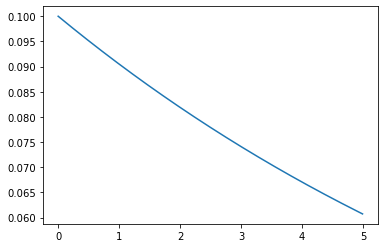

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 5, 0.01)

In [4]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

In [5]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121 

In [6]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

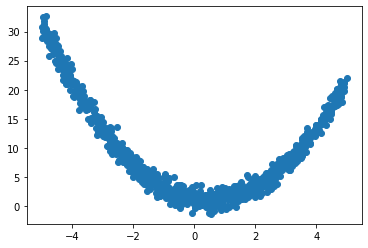

In [7]:
draw_data(data)

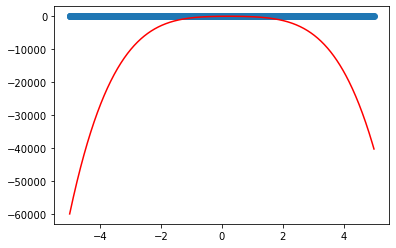

In [8]:
def draw_estimate(data, mu):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    ys = [phi_function(x, mu) for x in xs]
    plt.plot(xs, ys, color="red")
    
    plt.show()   
   
avg = w_dist.rvs(1)    
draw_estimate(data, avg)

In [9]:
def update(data):
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[i][1]*ph_vecs[i] for i in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[1]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[1].T, gauss_lambda[1]) , mu[1] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

In [10]:
update(data)


In [11]:
lambda_dist = gen_lambda_dist()
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

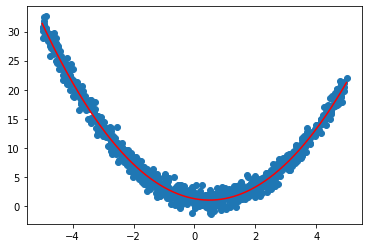

In [12]:
avg = w_dist.rvs(1)    
draw_estimate(data, avg)

In [13]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 1.31158239e+00],
        [-9.80539940e-01],
        [ 9.95998316e-01],
        [-8.68290760e-04],
        [ 2.70329251e-04]])]

In [14]:
a

[1, 501.0]

In [15]:
b

[0.1, 500.0392330095434]

In [16]:
1/np.sqrt(lmd)

array([0.98412461])

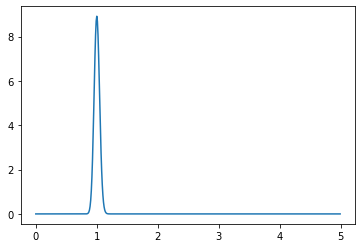

In [17]:
draw(lambda_dist, 0, 5, 0.01)

In [19]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data

[[-0.8994862026574579, 1.0978640038225693],
 [-1.9911720248434017, -0.27696946210059936],
 [-1.7691010624961379, 1.2902525006150278],
 [-1.5059245255919629, 0.7331978135734389],
 [-0.6080305353963322, -0.2398730078891808],
 [-0.6637767885184298, -0.9067192138169916],
 [3.5881872617987254, 19.377442215691268],
 [2.807104704709744, 13.979065576304302],
 [4.241390567081787, 28.495224677706403],
 [0.7524977175649039, 1.993139434928649],
 [-2.587966093268589, 1.89245267808837],
 [4.052489741139383, 26.266098293067756],
 [-0.032422933970498446, -0.36289475357225276],
 [-3.175734752552674, 4.1833992288352295],
 [2.06878192005596, 9.480640345942373],
 [-1.2230103725193597, -0.42603200688013704],
 [4.16196773452053, 27.7811444541925],
 [4.018868172237607, 25.379442240737205],
 [2.392504589454525, 12.051532890444014],
 [0.8715218124746615, 4.220626527847226],
 [0.11142743871659477, -0.25812752555542495],
 [-2.5097815260299097, 1.7123676357795015],
 [4.157144504608348, 28.04459783149721],
 [2.054